In [ ]:
# Pymaceuticals Inc.
---
### Analysis

#Based on the analysis below there is a positive relationship between weight and the volume of tumor; i.e. the higher the weight of the mice, the higher volume of tumor has been observed. 
#Also, the tumor volume decreased in volume after 30 days of drug regimen when using Capomulin. 
#In addition, when four drug regimens were filtered i.e. Capomulin, Ramicane, Infubinol and Ceftamin the results of the analysis showed that tumor volume ranged between 17.9 and 51.3 with data below or higher than those tumor volumes as possible outliers.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID"])
mouse_study_data

# Display the data table for preview
mouse_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mouse_study_df=mouse_study_data['Mouse ID'].unique()

mouse_count =len(mouse_study_df)
mouse_count

249

In [76]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_timepoint_df = mouse_study_data[['Timepoint','Mouse ID']]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_values = mouse_timepoint_df[mouse_timepoint_df.duplicated(['Mouse ID','Timepoint'],keep=False)]

duplicate_values[['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
107,g989,0
137,g989,0
329,g989,5
360,g989,5
620,g989,10
681,g989,10
815,g989,15
869,g989,15
950,g989,20
1111,g989,20


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID ='g989'
all_dataduplicate_mouse =mouse_study_data[mouse_study_data['Mouse ID']== duplicate_mouse_ID]
all_dataduplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [125]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_timepoint_df_noduplicates = mouse_study_data[mouse_study_data['Mouse ID'].isin(all_dataduplicate_mouse)== False]
mouse_timepoint_df_noduplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [126]:
# Checking the number of mice in the clean DataFrame.
no_mouse_duplicate_length=len(mouse_timepoint_df_noduplicates['Mouse ID'].unique())
no_mouse_duplicate_length

249

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_study_group_avg = mouse_timepoint_df_noduplicates.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
mouse_study_group_median = mouse_timepoint_df_noduplicates.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
mouse_study_group_var = mouse_timepoint_df_noduplicates.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
mouse_study_group_var_df=mouse_study_group_var.reset_index()
mouse_study_group_std = mouse_timepoint_df_noduplicates.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
mouse_study_group_sem = mouse_timepoint_df_noduplicates.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_dataframe = pd.DataFrame({
    "Mean Tumor Volume":mouse_study_group_avg,
    "Median Tumor Volume": mouse_study_group_median,
    "Tumor Volume Variance": mouse_study_group_var,
    "Tumor Volume Std. Dev": mouse_study_group_std,
    "Tumor Volume Std. Err":mouse_study_group_sem, 
    
    
})
summary_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [101]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_group_agg = mouse_timepoint_df_noduplicates.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 
                                                                                     ['mean', 'median','var','std','sem']})
mouse_study_group_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

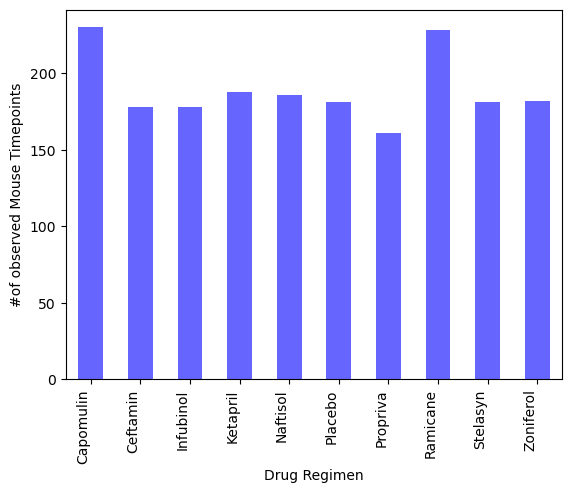

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows_drug=mouse_timepoint_df_noduplicates.groupby('Drug Regimen').size()
total_rows_timepoint=mouse_timepoint_df_noduplicates.groupby('Timepoint').size()

x_axis = total_rows_drug.plot(kind ='bar',color='b', alpha =0.6, align="center", width = 0.5)
x_axis.set_xlabel('Drug Regimen')
x_axis.set_ylabel('#of observed Mouse Timepoints')
drug_regimen=mouse_study_data['Drug Regimen'].unique()

plt.xticks(ha="right", rotation="vertical")
plt.show()


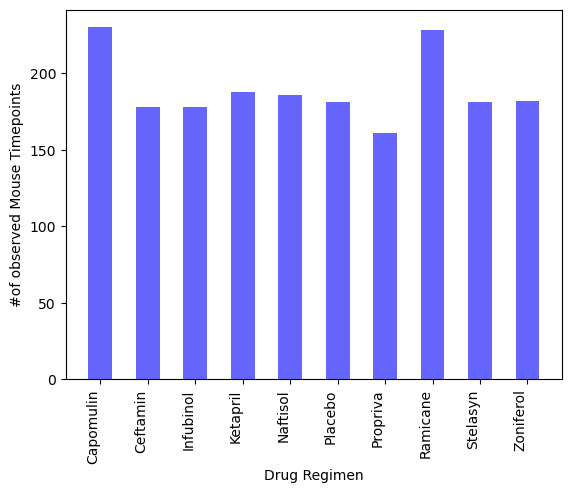

In [104]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows_drug=mouse_timepoint_df_noduplicates.groupby('Drug Regimen').size()
total_rows_timepoint=mouse_timepoint_df_noduplicates.groupby('Timepoint').size()


plt.bar(total_rows_drug.index,total_rows_drug,color='b', alpha =0.6, align="center", width = 0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('#of observed Mouse Timepoints')
plt.xticks(ha="right", rotation="vertical")
plt.show()

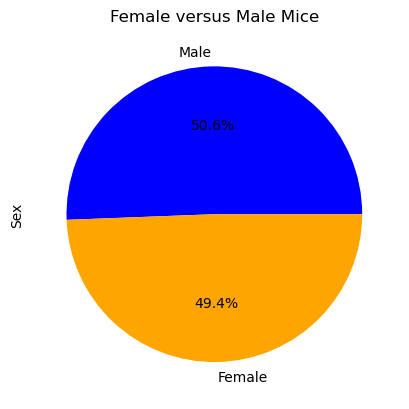

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female =mouse_timepoint_df_noduplicates['Sex'].value_counts()
male_female.plot(kind='pie',autopct='%1.1f%%',colors=['blue','orange'])
plt.ylabel('Sex')
plt.title('Female versus Male Mice')
plt.show()

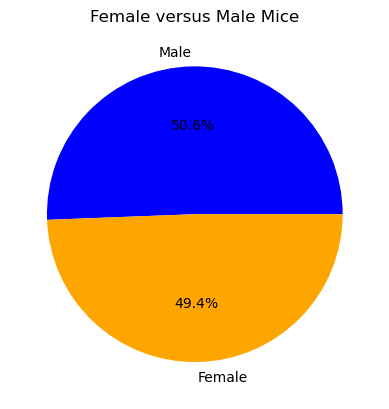

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_female, labels =male_female.index,autopct='%1.1f%%',colors=['blue','orange'])
plt.title('Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_regimen=['Capomulin','Ramicane','Infubinol','Ceftamin']
specific_regimen_data =mouse_timepoint_df_noduplicates[mouse_timepoint_df_noduplicates['Drug Regimen'].isin(specific_regimen)] 
specific_regimen_data

# Start by getting the last (greatest) timepoint for each mouse
specific_regimen_greatest_timepoint =specific_regimen_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = specific_regimen_data.merge(specific_regimen_greatest_timepoint, on=['Mouse ID', 'Timepoint'])[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
last_timepoint


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,u153,Ceftamin,45.000000
1,b447,Ceftamin,45.000000
2,x226,Ceftamin,45.000000
3,t573,Ceftamin,45.000000
4,c326,Infubinol,36.321346
...,...,...,...
95,a644,Ramicane,32.978522
96,i177,Ramicane,33.562402
97,r944,Capomulin,41.581521
98,u364,Capomulin,31.023923


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]
outlier_list =[]
count =0

for drug in regimen_list:
    four_drugs =last_timepoint[last_timepoint['Drug Regimen']== drug]
    final_volume_data = four_drugs.groupby('Mouse ID')['Tumor Volume (mm3)'].last()
    tumor_vol_data.append(final_volume_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol_data[count].quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq-lowerq
    count=count+1
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f" {drug} potential outliers on values below {lower_bound} and values above  {upper_bound}could be outliers.")

outlier_list

 Capomulin potential outliers on values below 20.70456164999999 and values above  51.83201549could be outliers.
 Ramicane potential outliers on values below 17.912664470000003 and values above  54.30681135could be outliers.
 Infubinol potential outliers on values below 36.83290494999999 and values above  82.74144559000001could be outliers.
 Ceftamin potential outliers on values below 25.355449580000002 and values above  87.66645829999999could be outliers.


[]

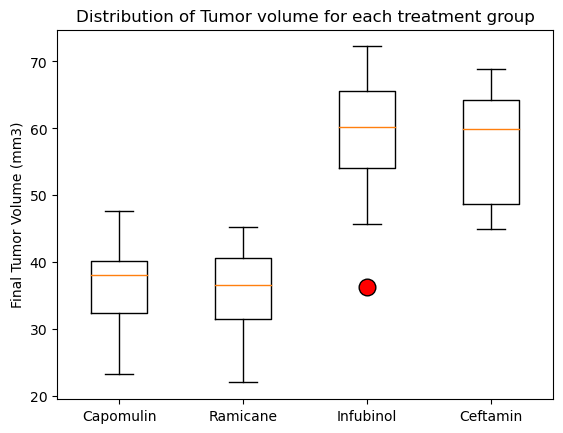

In [117]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_data,labels=regimen_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor volume for each treatment group')
plt.show()


## Line and Scatter Plots

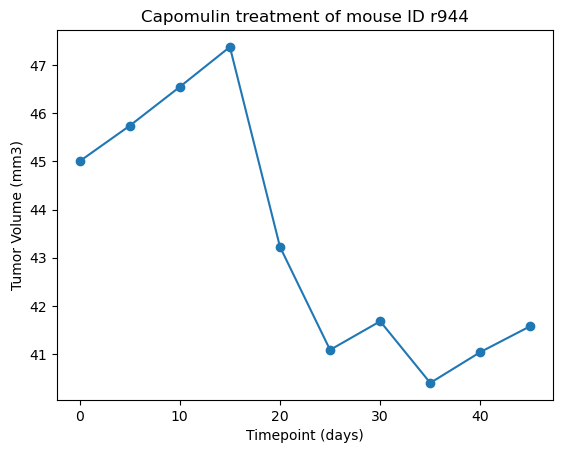

In [118]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse =mouse_timepoint_df_noduplicates[mouse_timepoint_df_noduplicates['Drug Regimen']=='Capomulin']
mouse_item_id ='r944'
specific_capomulin_mouse =capomulin_mouse[capomulin_mouse['Mouse ID']==mouse_item_id]

plt.plot(specific_capomulin_mouse['Timepoint'],specific_capomulin_mouse['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse ID r944')
plt.show()

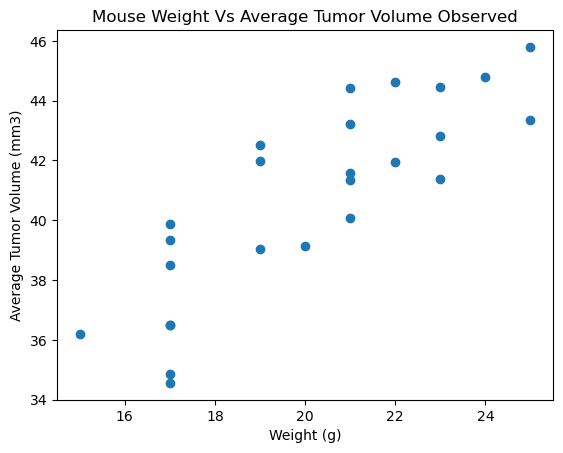

In [119]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = mouse_timepoint_df_noduplicates.loc[mouse_timepoint_df_noduplicates['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Vs Average Tumor Volume Observed")
plt.show()

## Correlation and Regression

The correlation coefficient mouse weight and average tumor volume is 0.84


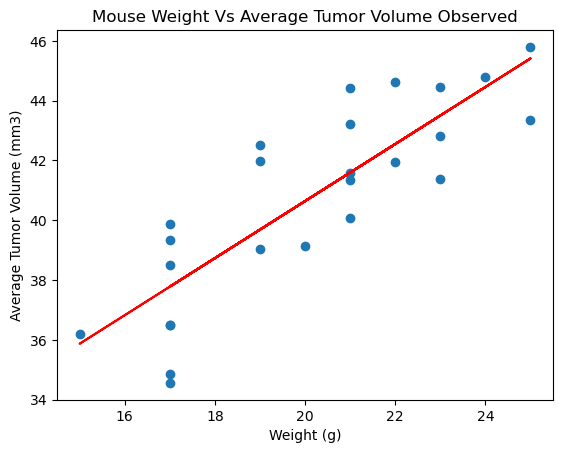

In [112]:
# Calculate the correlation coefficient and a linear regression model 

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation coefficient mouse weight and average tumor volume is {round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)}")
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = mouse_timepoint_df_noduplicates.loc[mouse_timepoint_df_noduplicates['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
x=capomulin_average['Weight (g)']
y= capomulin_average['Tumor Volume (mm3)']

plt.scatter(x,y)
m,b =np.polyfit(x,y,1)
plt.plot(x,m*x+b,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Vs Average Tumor Volume Observed")
plt.show()